# Linear Regression

- train_test_split 套件 代表 可以幫助我們將資料自動分割成training dataset 與 testing dataset
- randomstate 是隨機分割dataset 而非按照順序分割，該數值每次變動，分割後的資料也會不同，但若數值不動，則會分割相同的資料
- import model : from sklearn.{model 簡稱}_model import {model完整的名稱}
- 在詮釋結果的時候需要以 單位變化量做為解釋，比如說上升一單位的x1，提升多少的y(price)
- 如果residual 為常態分佈，代表model很好
- model 的 evaluation 要用 sklearn.metrics 的方法去計算 最小平方差為何(y^-y)

In [1]:
from sklearn.cross_validation import train_test_split # 
from sklearn.model_selection import train_test_split

/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.drop("Address",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=5000, step=1)

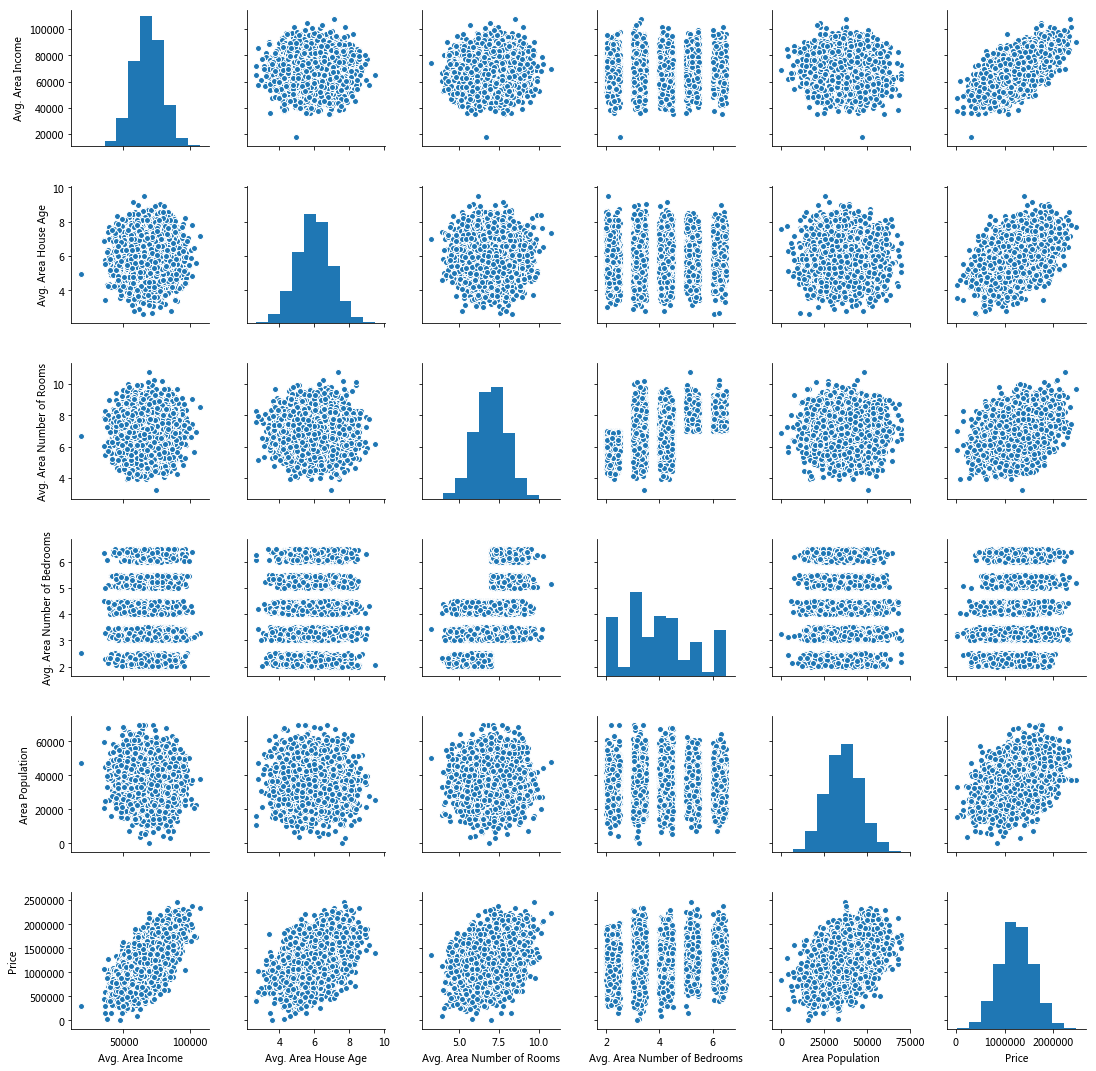

In [10]:
#可以看出特徵彼此之間的相關性
sns.pairplot(data=df)

In [11]:
mask1=df["Avg. Area Number of Bedrooms"]>5.4
mask2=df["Avg. Area Number of Bedrooms"]<6
df[ mask1 & mask2]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
19,62085.276403,5.739411,7.091808,5.49,44922.106702,1.030591e+06
64,59539.948450,6.018590,7.007676,5.43,58600.827150,1.411730e+06
119,63890.471568,4.972307,7.916386,5.49,43416.497821,1.252391e+06
127,72138.870482,7.163641,8.485778,5.45,35799.638274,1.629984e+06
268,89868.891927,4.504275,7.234480,5.45,30101.724574,1.421715e+06
275,68494.982552,7.230365,7.265463,5.46,13998.571205,1.202988e+06
287,75429.178976,6.818759,7.570447,5.48,36769.249682,1.592768e+06
369,70151.086612,6.724123,7.706581,5.41,15255.237756,1.075675e+06
406,56679.016017,5.096643,8.971412,5.49,40785.027303,1.110599e+06
444,47065.053303,5.767575,7.266028,5.49,24125.875810,5.668962e+05


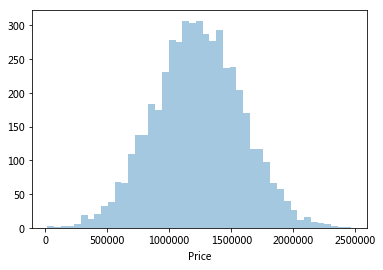

In [12]:
sns.distplot(a=df["Price"],kde=False)

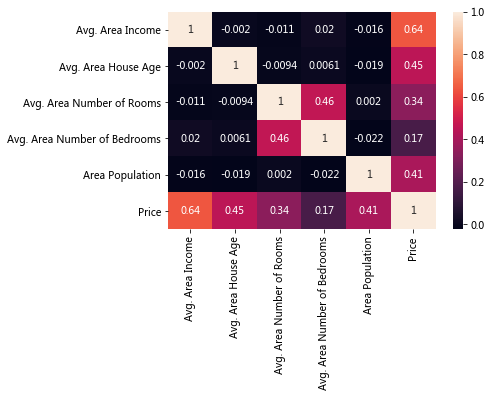

In [13]:
sns.heatmap(df.corr(),annot=True)

In [15]:
#X is features and y is result
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
Y=df["Price"]

In [16]:
#分割成 training dataset and testing dataset 的 x_train, x_text, y_train ,y_test
# 隨著random_state不同， 分割後的資料也不同，但若random_state一樣的話，永遠就分割相同的資料
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [17]:
X_train.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1303,68091.179676,5.364208,7.502956,3.10,44557.379656
1051,75729.765546,5.580599,7.642973,4.21,29996.018448
4904,70885.420819,6.358747,7.250241,5.42,38627.301473


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
LR.intercept_

-2640159.7968519111

In [32]:
y_predict = LR.predict(X_test)
LR_score=LR.score(X_train,y_train)
print("LR's Accuracy is :{}".format(LR_score))

LR's Accuracy is :0.9181223200568411


In [24]:
LR.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [23]:
# 自變數係數
LR.coef_

array([  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
         2.23380186e+03,   1.51504200e+01])

In [31]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [30]:
#呈現每一個自變數的係數為何 將參數名稱作為index
cdf=pd.DataFrame(data=LR.coef_,index=X.columns,columns=["Coef"])
cdf

,Coef
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Real Data 
- from sklearn.datasets import load_boston
- dataset is JSON Format

In [33]:
from sklearn.datasets import load_boston

In [44]:
boston = load_boston() 
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [45]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [61]:
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [62]:
print(boston["data"])

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


# Continue  Regression Predicition

In [63]:
y_predict

array([ 1260960.70567626,   827588.75560352,  1742421.24254328, ...,
         372191.40626952,  1365217.15140895,  1914519.54178824])

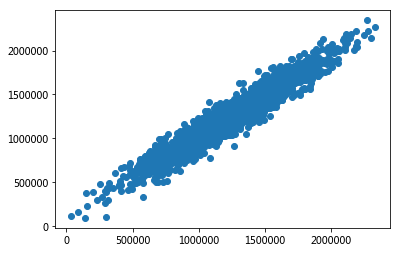

In [80]:
#越是一條線越精準
plt.scatter(y_test,y_predict)

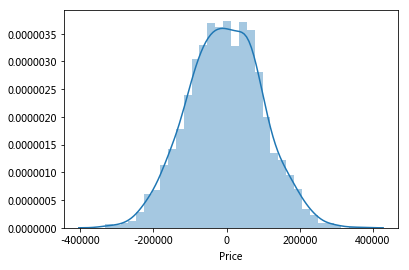

In [86]:
#先不予理會training dataset 因為他是拿來建模的，我們先考慮到testin data set
# y_test代表 y 實際的 data points，y_predict 代表 y^ ，兩個相減就代表 residual，若residual形成一個常態分佈，代表feature的處理與建模很ok 
sns.distplot(y_test-y_predict,kde=True)

In [87]:
#為了要降低model的residual
from sklearn import metrics

# 計算殘差有三種方式
- MAE
- MSE
- MRSE
- M is Mean(1/n)

In [88]:
metrics.mean_absolute_error(y_test,y_predict) 

82288.222519149567

In [90]:
metrics.mean_squared_error(y_test,y_predict)

10460958907.209501

In [92]:
# 開根號直接用 np.sqrt()
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

102278.82922291153